<a href="https://colab.research.google.com/github/KOO-96/2022-SuwonUniv_Dacon/blob/main/siksu/%5B2022_%EC%88%98%EC%9B%90%EB%8C%80%5D_Stage_1_%EA%B5%AC%EB%82%B4%EC%8B%9D%EB%8B%B9_%EC%8B%9D%EC%88%98_%EC%B5%9C%EC%A2%85_%EC%98%88%EC%B8%A1_%EA%B5%AC%EC%84%B1%EC%A4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv]
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
fc-cache: invalid option -- ']'
usage: fc-cache [-EfrsvVh] [-y SYSROOT] [--error-on-no-fonts] [--force|--really-force] [--sysroot=SYSROOT] [--system-only] [--verbose] [--version] [--help] [dirs]
Build font information caches in [dirs]
(all directories in font configuration by default).

  -E, --error-on-no-fonts  raise an error if no fonts in a directory
  -f, --force              scan directories with apparently valid caches
  -r, --really-force       erase all existing caches, then rescan
  -s, --system-only        scan system-wide directories only
  -y, --sysroot=SYSROOT    prepend SYSROOT to all paths for scanning
  -v, --verbose   

#라이브러리

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family = 'NanumBarunGothic')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 수업시간에 진행한 예측 




##데이터 로드

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/235743_구내식당 식사 인원 예측 AI 경진대회_data/test.csv')
train = pd.read_csv('/content/drive/MyDrive/235743_구내식당 식사 인원 예측 AI 경진대회_data/train.csv')
submission = pd.read_csv('/content/drive/MyDrive/235743_구내식당 식사 인원 예측 AI 경진대회_data/sample_submission.csv')

In [ ]:
train.info() 
# null 값은 없는 것으로 확인 #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


### 데이터전처리

In [ ]:
train = train[train['석식계'] != 0]

train.loc[train['요일']=='월', '요일'] = 1
train.loc[train['요일']=='화', '요일'] = 2
train.loc[train['요일']=='수', '요일'] = 3
train.loc[train['요일']=='목', '요일'] = 4
train.loc[train['요일']=='금', '요일'] = 5

def month(text:str):
  return text[5:7]

train['월'] = train['일자'].map(month)

def day(text:str):
  return text[-2:]

train['일'] = train['일자'].map(day)

train['현재원'] = train['본사정원수'] - train['본사휴가자수'] - train['본사출장자수'] - train['현본사소속재택근무자수']

#################################################

test.loc[test['요일']=='월', '요일'] = 1
test.loc[test['요일']=='화', '요일'] = 2
test.loc[test['요일']=='수', '요일'] = 3
test.loc[test['요일']=='목', '요일'] = 4
test.loc[test['요일']=='금', '요일'] = 5

def month(text:str):
  return text[5:7]

test['월'] = test['일자'].map(month)

def day(text:str):
  return text[-2:]

test['일'] = test['일자'].map(day)

test['현재원'] = test['본사정원수'] - test['본사휴가자수'] - test['본사출장자수'] - test['현본사소속재택근무자수']

### 중식계 예측모델

In [ ]:
features = ['요일', '월', '일', '현재원', '본사휴가자수',	'본사출장자수',	'본사시간외근무명령서승인건수',	'현본사소속재택근무자수']
train[features].head(2)

,요일,월,일,현재원,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수
0,1,02,01,2401.0,50,150,238,0.0
1,2,02,02,2378.0,50,173,319,0.0


In [ ]:
features = features[:-1]
features

['요일', '월', '일', '현재원', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수']

In [ ]:
X = train[features]
y = train['중식계']

from sklearn.ensemble import RandomForestRegressor

lunch_model = RandomForestRegressor()
lunch_model.fit(X,y)

lunch_count_predict = lunch_model.predict(test[features])

In [ ]:
features.append('중식계')
features

['요일', '월', '일', '현재원', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '중식계']

In [ ]:
test['중식계'] = lunch_count_predict
test.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,월,일,현재원,중식계
0,2021-01-27,3,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치,01,27,2355.0,1014.97
1,2021-01-28,4,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지,01,28,2319.0,990.22


### 석식계 예측모델

In [ ]:
X = train[features]
y = train['석식계']

from sklearn.ensemble import RandomForestRegressor

dinner_model = RandomForestRegressor()
dinner_model.fit(X,y)

dinner_count_predict = dinner_model.predict(test[features])

In [ ]:
submission['중식계'] = lunch_count_predict
submission['석식계'] = dinner_count_predict
submission.to_csv('submission(7_11).csv',index=False)

# 새롭게 생각한 가설을 통한 예측

In [ ]:
# target설정간 수업시간에 진행한 방법외에도 생각해보았다. #
# 국이랑 메인반찬만 맛있으면 무조건 먹을 것 이고  라고 가정을 하였고 마지막 수업때 호불호 음식에 대해 이야기를 해서 진행하였다. #
# 파인애플볶음밥과 같은 음식에서 호불호가 큰차이가 보였다. #

##데이터 로드

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/235743_구내식당 식사 인원 예측 AI 경진대회_data/test.csv')
train = pd.read_csv('/content/drive/MyDrive/235743_구내식당 식사 인원 예측 AI 경진대회_data/train.csv')
submission = pd.read_csv('/content/drive/MyDrive/235743_구내식당 식사 인원 예측 AI 경진대회_data/sample_submission.csv')

In [ ]:
train.loc[train['요일']=='월', '요일'] = 1
train.loc[train['요일']=='화', '요일'] = 2
train.loc[train['요일']=='수', '요일'] = 3
train.loc[train['요일']=='목', '요일'] = 4
train.loc[train['요일']=='금', '요일'] = 5

def month(text:str):
  return text[5:7]

train['월'] = train['일자'].map(month)

def day(text:str):
  return text[-2:]

train['일'] = train['일자'].map(day)

train['현재원'] = train['본사정원수'] - train['본사휴가자수'] - train['본사출장자수'] - train['현본사소속재택근무자수']

In [ ]:
lunch = []

for i in range(len(train)):
    a = train.loc[i,'중식메뉴'].split(' ')
    a = list(filter(None, a))
    for b in a:
      if '(' in b:
        a.remove(b) 
    lunch.append(a)

In [ ]:
rice = []
soup = []
main = []

for i in range(len(train)):
    if lunch[i][0]:
        rice.append(lunch[i][0])
    if lunch[i][1]:
        soup.append(lunch[i][1])
    if lunch[i][2]:
        main.append(lunch[i][2])

In [ ]:
train['rice'] = rice
train['soup'] = soup
train['main'] = main
train.head(1)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,월,일,현재원,rice,soup,main
0,2016-02-01,1,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,02,01,2401.0,쌀밥/잡곡밥,오징어찌개,쇠불고기


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
 12  월               1205 non-null   object 
 13  일               1205 non-null   object 
 14  현재원             1205 non-null   float64
 15  rice            1205 non-null   object 
 16  soup            1205 non-null   object 
 17  main            1205 non-null   o

In [ ]:
dinner = []

for i in range(len(train)):
    a = train.loc[i,'석식메뉴'].split(' ')
    a = list(filter(None, a))
    for b in a:
      if '(' in b:
        a.remove(b) 
    dinner.append(a)

- 중식과는 달리 석식이 제공되지 않는 날과 아무도 먹지않은 날이 있엇다.

In [ ]:
q = train[train['석식계'] ==0]
q['석식메뉴'].unique()

array(['    *        ', '     *       ', '      자기계발의날      ',
       '      *자기계발의날*      ', '      가정의날      ',
       '쌀밥/잡곡밥 (쌀:국내산) 된장찌개  미니함박조림  계란말이  비름나물  포기김치 (김치:국내산) ',
       '쌀밥/잡곡밥 (쌀:국내산) 쇠고기무국  고추잡채*꽃빵  계란찜  오이무침  포기김치 (김치:국내산) ',
       '      *      ', '            ', '    자기계발의날        ',
       '    자기개발의날        ', '    *  자기계발의날  *    ',
       '    *  자기개발의날  *    ', '   *  자기개발의날  *     ',
       ' ＜자기 계발의 날＞      '], dtype=object)

In [ ]:
drice = []
dsoup = []
dmain = []

for word in dinner:
  if len(word) == 0:
    drice.append(' ') 
    dsoup.append(' ')
    dmain.append(' ')
  elif '*' in word or '자기계발의날' in word or '*자기계발의날*' in word or '가정의날' in word or '자기개발의날' in word or '*자기개발의날*' in word:
    drice.append(' ')    
    dsoup.append(' ')
    dmain.append(' ')
  else:
    drice.append(word[0])
    dsoup.append(word[1])
    dmain.append(word[2])

In [ ]:
train['drice'] = drice
train['dsoup'] = dsoup
train['dmain'] = dmain
train.head(1)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,석식계,월,일,현재원,rice,soup,main,drice,dsoup,dmain
0,2016-02-01,1,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",...,331.0,02,01,2401.0,쌀밥/잡곡밥,오징어찌개,쇠불고기,쌀밥/잡곡밥,육개장,자반고등어구이


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
 12  월               1205 non-null   object 
 13  일               1205 non-null   object 
 14  현재원             1205 non-null   float64
 15  rice            1205 non-null   object 
 16  soup            1205 non-null   object 
 17  main            1205 non-null   o

-밥 그리고 국과 반찬에 의한 관계를 확인하기 위해 범주형 데이터로 변환

In [ ]:
train['rice'] =  train['rice'].astype('category')
train['rice'] = train.rice.cat.codes

train['soup'] =  train['soup'].astype('category')
train['soup'] = train.soup.cat.codes

train['main'] =  train['main'].astype('category')
train['main'] = train.main.cat.codes

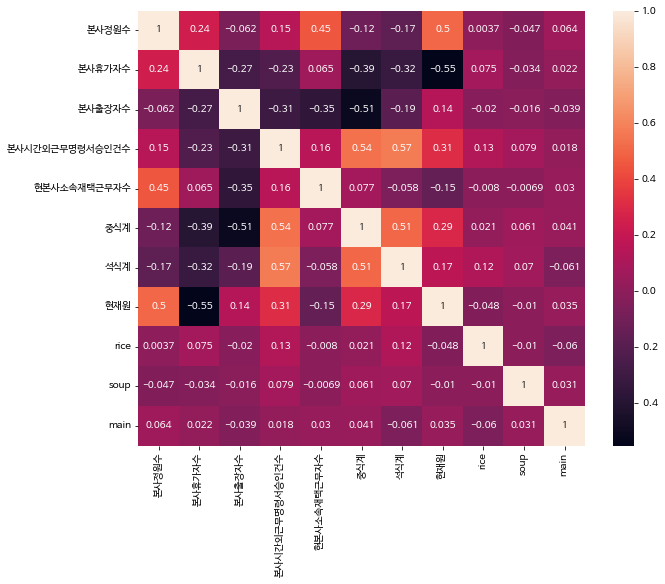

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot = True)

- 밥, 국, 메인반찬의 상관관계를 확인해보니...
크게 영향을 주는 것 같진 않았다. 그냥 주면 먹는 것 같다.

# 수업시간에 진행한 예측을 통해 재분석 시작.

# 데이터 다시 불러오기

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/235743_구내식당 식사 인원 예측 AI 경진대회_data/test.csv')
train = pd.read_csv('/content/drive/MyDrive/235743_구내식당 식사 인원 예측 AI 경진대회_data/train.csv')
submission = pd.read_csv('/content/drive/MyDrive/235743_구내식당 식사 인원 예측 AI 경진대회_data/sample_submission.csv')

## 데이터전처리

In [ ]:
train = train[train['석식계'] != 0]

train.loc[train['요일']=='월', '요일'] = 1
train.loc[train['요일']=='화', '요일'] = 2
train.loc[train['요일']=='수', '요일'] = 3
train.loc[train['요일']=='목', '요일'] = 4
train.loc[train['요일']=='금', '요일'] = 5

def month(text:str):
  return text[5:7]

train['월'] = train['일자'].map(month)

def day(text:str):
  return text[-2:]

train['일'] = train['일자'].map(day)

train['현재원'] = train['본사정원수'] - train['본사휴가자수'] - train['본사출장자수'] - train['현본사소속재택근무자수']

#################################################

test.loc[test['요일']=='월', '요일'] = 1
test.loc[test['요일']=='화', '요일'] = 2
test.loc[test['요일']=='수', '요일'] = 3
test.loc[test['요일']=='목', '요일'] = 4
test.loc[test['요일']=='금', '요일'] = 5

def month(text:str):
  return text[5:7]

test['월'] = test['일자'].map(month)

def day(text:str):
  return text[-2:]

test['일'] = test['일자'].map(day)

test['현재원'] = test['본사정원수'] - test['본사휴가자수'] - test['본사출장자수'] - test['현본사소속재택근무자수']

In [ ]:
lun = ['요일', '월',	'일', '현재원',	'본사휴가자수',	'본사출장자수',	'본사시간외근무명령서승인건수',	'현본사소속재택근무자수']
train[lun].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 0 to 1204
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   요일              1162 non-null   object 
 1   월               1162 non-null   object 
 2   일               1162 non-null   object 
 3   현재원             1162 non-null   float64
 4   본사휴가자수          1162 non-null   int64  
 5   본사출장자수          1162 non-null   int64  
 6   본사시간외근무명령서승인건수  1162 non-null   int64  
 7   현본사소속재택근무자수     1162 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 81.7+ KB


In [ ]:
features = ['요일', '월',	'일', '현재원',	'본사휴가자수',	'본사출장자수',	'본사시간외근무명령서승인건수',	'현본사소속재택근무자수']
features

['요일', '월', '일', '현재원', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']

In [ ]:
train['요일'] =  train['요일'].astype('int')
train['월'] =  train['월'].astype('int')
train['일'] =  train['일'].astype('int')

test['요일'] =  test['요일'].astype('int')
test['월'] =  test['월'].astype('int')
test['일'] =  test['일'].astype('int')

In [ ]:
X = train[features]
y = train['중식계']

import numpy as np
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb
xgb_clf = xgb.XGBClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

param = {
    'max_depth':[2,3,4],
    'n_estimators':[100,200,300],
    'colsample_bytree':[0.7,0.9,1]
}

model = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param, cv=10)

grid_search.fit(X, y)
#{'colsample_bylevel': 0.5, 'colsample_bytree': 0.5, 'max_depth': 3, 'n_estimators': 600}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=0.75)

print("최적의 하이퍼파라미터:", grid_search.best_params_)
print("최고 예측 정확도: {:.2f}".format(grid_search.best_score_))

[13:46:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
y_pred_lunch = grid_search.predict(test[features])

In [ ]:
test['중식계'] = y_pred_lunch

In [ ]:
X = train[features]
y = train['석식계']

import numpy as np
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb
xgb_clf = xgb.XGBClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

param = {
    'max_depth':[2,3,4],
    'n_estimators':[100,200,300],
    'colsample_bytree':[0.7,0.9,1]
}

model = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param, cv=10)

grid_search.fit(X, y)
#{'colsample_bylevel': 0.5, 'colsample_bytree': 0.5, 'max_depth': 3, 'n_estimators': 600}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=0.75)

[13:46:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

XGBRegressor(colsample_bylevel=0.5, learning_rate=1, max_depth=2,
             n_estimators=200, silent=True, subsample=0.75)

In [ ]:
y_pred_dinner = grid_search.predict(test[features])

In [ ]:
submission['중식계'] = y_pred_lunch
submission['석식계'] = y_pred_dinner
submission.to_csv('submission(7_12).csv',index=False)

In [ ]:
submission.head()

,일자,중식계,석식계
0,2021-01-27,989.487488,391.798584
1,2021-01-28,905.819153,417.291931
2,2021-01-29,605.211426,257.444946
3,2021-02-01,1266.182617,501.997375
4,2021-02-02,1016.603027,507.380341
